Step 1: Import Libraries & Load Dataset

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv('./Titanic-Dataset.csv')

# Preview the data
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Step 2: Explore Data (Structure + Nulls + Types)

In [6]:
# Data shape and types
print("Data shape:", df.shape)

df.info()


Data shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Checking null values
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Summary stats
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Step 3: Handle Missing Values

In [11]:
# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
# Fill missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
# Drop 'Cabin' due to too many missing values
df = df.drop(columns='Cabin')

In [14]:
# Drop rows with missing 'Fare' (if any)
df = df.dropna(subset=['Fare'])

Step 4: Convert Categorical to Numeric (Encoding)

In [15]:
# Encode 'Sex' and 'Embarked' using One-Hot Encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [18]:
# Check if any object (categorical) columns remain
print("Remaining object columns:", df.select_dtypes(include='object').columns)

# Preview encoded data
df.head()


Remaining object columns: Index(['Name', 'Ticket'], dtype='object')


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


 Step 5: Normalize/Standardize Numerical Features

In [19]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
num_cols = ['Age', 'Fare']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [20]:
# Check top values after scaling
df[num_cols].head()


,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


Step 6: Visualize and Remove Outliers (Boxplot Method)

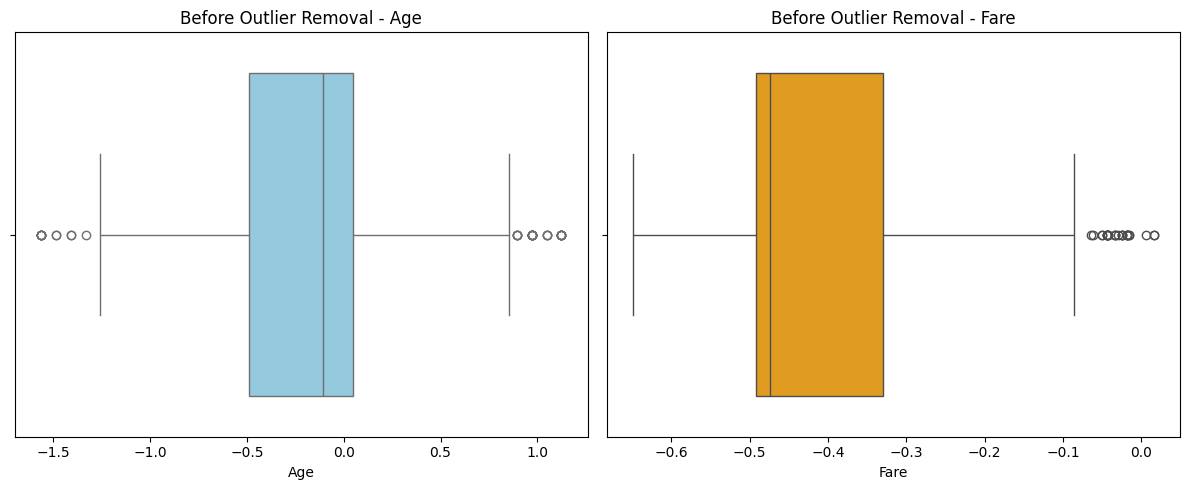

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots before removing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'], color='skyblue')
plt.title("Before Outlier Removal - Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'], color='orange')
plt.title("Before Outlier Removal - Fare")

plt.tight_layout()
plt.show()


In [32]:
import numpy as np

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers from Age
df = remove_outliers_iqr(df, 'Age')

# Apply log transform to Fare and remove outliers
df['Fare_log'] = np.log1p(df['Fare'])  # log(1 + x)
df = remove_outliers_iqr(df, 'Fare_log')

# Replace original Fare with log-transformed version
df.drop(columns='Fare', inplace=True)
df.rename(columns={'Fare_log': 'Fare'}, inplace=True)



<ipython-input-32-97005092431e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare_log'] = np.log1p(df['Fare'])  # log(1 + x)


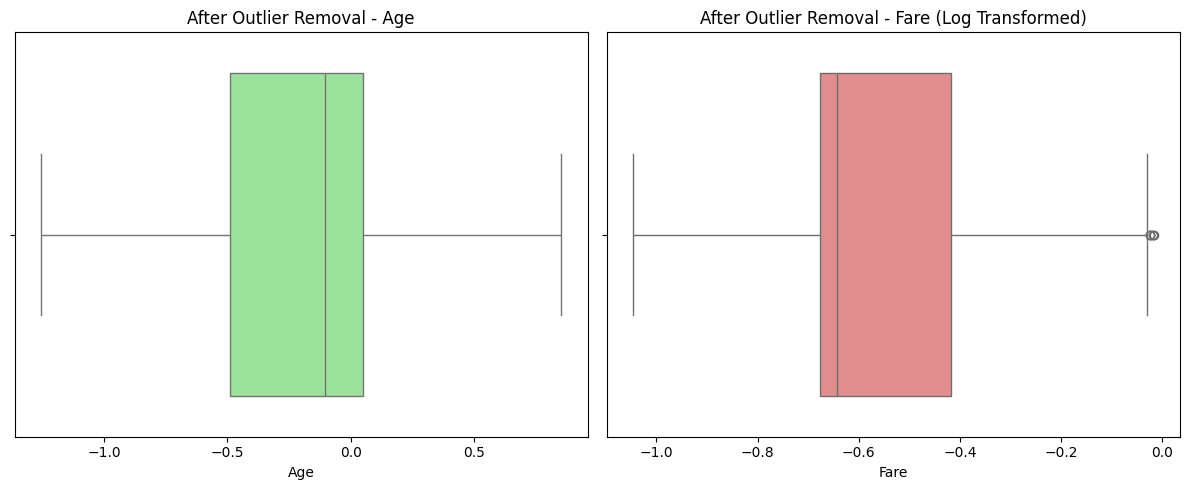

In [33]:
# Boxplots after removing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title("After Outlier Removal - Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'], color='lightcoral')
plt.title("After Outlier Removal - Fare (Log Transformed)")

plt.tight_layout()
plt.show()



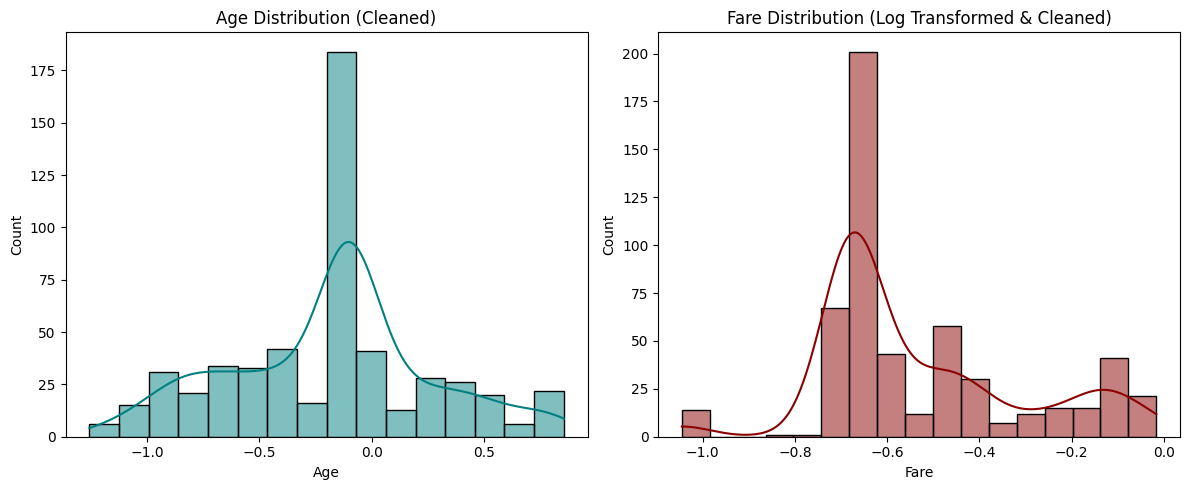

In [34]:
# Distribution comparison (optional)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, color='teal')
plt.title("Age Distribution (Cleaned)")

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=True, color='darkred')
plt.title("Fare Distribution (Log Transformed & Cleaned)")

plt.tight_layout()
plt.show()


 Step 7: Final Preprocessing (Drop Irrelevant Columns & Split)

In [35]:
# Drop unnecessary columns
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final shapes
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (430, 8)
Testing Set: (108, 8)


Step 8: Save the cleaned data in csv file


In [36]:
df.to_csv("Titanic-Dataset_cleaned.csv", index=False)